<a href="https://colab.research.google.com/github/Halima717/Classification/blob/main/BInary_classification_bear_panda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# IMAGE CLASSIFICATION
## pandas or bears
##dataset_url = 'https://www.kaggle.com/datasets/mattop/panda-or-bear-image-classification?select=PandasBears'

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/dataset_folder'

# importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

# Loading and augmenting images for training preparation

In [ ]:
train_dir = '/content/drive/MyDrive/PandasBears/Train'
test_dir = '/content/drive/MyDrive/PandasBears/Test'

# Data Augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing the images
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom transformations
    horizontal_flip=True,  # Horizontal flipping
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# For the test set, only rescaling the images
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the images from the directories in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize the images to 224x224
    batch_size=32,  # Batch size
    class_mode='binary'  # binary classification (bear vs panda)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize the images to 224x224
    batch_size=32,  # Batch size
    class_mode='binary'  # Binary classification (bear vs panda)
)


Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# preparing the base model by:
### freezing all the layers and
### adding some custom layers at the top of it

In [ ]:
base_model = VGG16(weights='imagenet', include_top = False, input_shape = (224,224,3))
#freezing the model's layers to prevent them from being trained
for layer in base_model.layers:
  layer.trainable = False

# custom classification layers on top of the VGG16 base model
x = Flatten()(base_model.output)  # Flatten the output from the convolutional layers,converts a multi-dimensional tensor (like a 2D feature map) into a 1D array.
x = Dense(128, activation='relu')(x)  # Fully connected layer WITH 128 NEORONS
x = Dropout(0.5)(x)  # means 50% of the neurons will be turned off randomly during training.During training, dropout randomly "drops" or "turns off" a fraction of the neurons in the layer, forcing the network to rely on different parts of the network and thus generalize better
x = Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid for binary classification

# base model
model = Model(inputs=base_model.input, outputs=x)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# used binary cross entropy for binary classification
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
#An optimizer is an algorithm that adjusts the neural network's weights during training to minimize the loss function,
# which measures the difference between the model's predictions and the actual values.
# Define early stopping to prevent overfitting (monitoring loss on test data)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

##### Steps Per Epoch:
###### steps_per_epoch determines how many batches of data will be processed in one epoch during training.This is calculated as the number of samples in the dataset divided by the batch size.For training, with 500 images and a batch size of 32, the number of steps per epoch is

steps_per_epoch = 500 // 32 = 15
Plus, there may be a smaller batch left (i.e., 500 % 32 = 20 images), so we may use np.ceil()
steps_per_epoch = np.ceil(500 / 32) = 16

## now training the model

In [ ]:
import time
start_time = time.time()
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping]
)

end_time = time.time()
training_time = end_time - start_time
print(f"Total Training Time: {training_time // 60} minutes")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 172s 7s/step - accuracy: 0.8120 - loss: 0.4272 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 2/10
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2:33 11s/step - accuracy: 1.0000 - loss: 0.0436

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - accuracy: 1.0000 - loss: 0.0436 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 456ms/step - accuracy: 1.0000 - loss: 0.0352 - val_accuracy: 1.0000 - val_loss: 8.0100e-04
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 7.6217e-04
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.9987 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 369ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 3.6240e-04
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 7.0384e-04
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 441ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accurac

# the final model with last 4 layers of vgg16 unfreezed

In [ ]:
# Unfreeze some of the top layers of the VGG16 base model for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers (you can adjust this)
    layer.trainable = True

# Recompile the model after unfreezing some layers
model.compile(optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model with a lower learning rate
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Fine-tune for a few more epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)
model.save('/content/drive/MyDrive/vgg16_bear_panda.h5')

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 582ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 3.2184e-06
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 1.0000 - loss: 1.3056e-04 - val_accuracy: 1.0000 - val_loss: 5.5143e-07
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 1.0000 - loss: 1.1206e-04 - val_accuracy: 1.0000 - val_loss: 5.8063e-07
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.7078e-05 - val_accuracy: 1.0000 - val_loss: 8.6963e-08
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 453ms/step - accuracy: 1.0000 - loss: 2.4961e-04 - val_accuracy: 1.0000 - val_loss: 7.8069e-06
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 1.3033e-04 - val_accuracy: 1.0000 - val_loss: 2.7892e-06
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 389ms/step - accuracy: 1.0000 - loss: 2.4200e-04 - val_accuracy: 1.0000 - val_loss: 8.3332e-08
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step 

# checking the performance of our model on another unseen image


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The model predicts this image as: panda


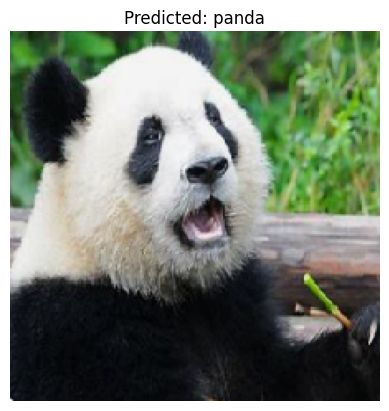

In [ ]:
from keras.models import load_model
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
model = load_model('/content/drive/MyDrive/vgg16_bear_panda.h5')
#Load and preprocess the image
img_path = '/content/drive/MyDrive/4.png'

# Load the image with the target size (same as the input size expected by the model)
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image (scale the pixel values to [0, 1])
img_array = img_array / 255.0

# Add a batch dimension (for the model to process it)
#np.expand_dims(img_array, axis=0) adds a batch dimension to the image, converting its shape from (height, width, channels) to (1, height, width, channels), making it compatible for model input.(input should be in batch form)
img_array = np.expand_dims(img_array, axis=0)

#  Make a prediction using the trained model
prediction_prob = model.predict(img_array)
#  Convert the probability to a class (0 or 1)
predicted_class = (prediction_prob > 0.5).astype(int)

# Map the predicted class (0 or 1) to the actual class name (bear or panda)
class_names = ['bear', 'panda']  #eg-- dictionary test_generator.class_indices = {'bear': 0, 'panda': 1}
predicted_class_name = class_names[predicted_class[0][0]]

#  Output the result
print(f"The model predicts this image as: {predicted_class_name}")

#  Optionally, display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()
